# Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import traceback

# Tensor

## Defining Tensor

Tensor is kind of matrix, and if we have a matrix like

$$\mathbf{x}=\left(\begin{matrix}1\\1\end{matrix}\right)\tag{1}$$

We can make tensor of (1) directly using tf.constant() method like

In [70]:
x = tf.constant([[1.],[1.]])
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

Since elements of (1) are only 1, we can use tf.ones() instead of typing all elements like

In [71]:
x = tf.ones(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

We can make another type of tensor using tf.Variable method

In [72]:
x = tf.Variable([[1.], [1.]])
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

Also, we can make tensor with 0 like tf.ones() as

In [73]:
x = tf.zeros(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

And we can make tensor with random values from noraml distribution using

In [74]:
x = tf.random.normal(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 2.0667102],
       [-0.3204527]], dtype=float32)>

In [75]:
x = tf.random.uniform(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.12177932],
       [0.84351504]], dtype=float32)>

Also we can make tensor with random values from uniform distribution using

## Modifying Tensor

All 3 method of defining tensor can make tensor similar to (1), but there is different between those methods. Before that, we can change tensor's value using .assign() method

In [76]:
x = tf.Variable([[1.], [1.]])
x.assign(tf.Variable([[2.], [2.]]))
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.],
       [2.]], dtype=float32)>

We can change only 1 values from tensor as

In [77]:
x[0, 0].assign(1.)
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Also, we can add tensor to tensor using

In [78]:
y = tf.ones((2, 1))
x.assign_add(y)
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.],
       [3.]], dtype=float32)>

However, only tensor made by tf.Variable() can be modified. Tensor made by .constant(), .ones() can't be modified.

If we try to modify the tensor made by .constant() or ones(), error occurs.

In [79]:
x = tf.constant([[1.],[1.]])

try:
    x.assign(tf.Variable([[2.], [2.]]))
except Exception as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\Jeongho Seo\AppData\Local\Temp\ipykernel_33336\2212837504.py", line 4, in <module>
    x.assign(tf.Variable([[2.], [2.]]))
    ^^^^^^^^
  File "C:\Users\Jeongho Seo\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\framework\tensor.py", line 260, in __getattr__
    self.__getattribute__(name)
AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'


## Generating Modifiable Tensor

If want to make tensor with random values from normal distribution, but can be modified, we can make tensor like

In [80]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.97408605],
       [-0.60656327],
       [ 0.10883276]], dtype=float32)>

## Mathematical Operations

Let's assume there are $2$ $2\times 2$ 2-dimensional matrices $\mathbf{A}, \mathbf{B}$ as

$$\mathbf{A}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)\tag{2}$$
$$\mathbf{B}=\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)\tag{3}$$

We can make tensor of (2), (3) as

In [81]:
a = tf.Variable([[1., 4], [9., 0]])
b = tf.Variable([[5., 0], [2., -1]])
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 4.],
       [9., 0.]], dtype=float32)>

When we have 2 same shape of matrix, we can conduct matrix addition like

$$\mathbf{A}+\mathbf{B}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)+\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}6&4\\11&-1\end{matrix}\right)\tag{4}$$

We can conduct matrix addition (4) using tensor as

In [82]:
a + b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 6.,  4.],
       [11., -1.]], dtype=float32)>

Also, we can conduct matrix subtraction like

$$\mathbf{A}-\mathbf{B}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)+(-1)\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)+\left(\begin{matrix}-5&0\\-2&1\end{matrix}\right)=\left(\begin{matrix}-4&4\\7&1\end{matrix}\right)\tag{5}$$

We can conduct matrix subtraction (5) using tensor as

In [83]:
a - b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-4.,  4.],
       [ 7.,  1.]], dtype=float32)>

We can get Hadamard power(element-wise power) on matrix like

$$\mathbf{A}^{\circ2}=\mathbf{A}\circ\mathbf{A}=\left(\begin{matrix}1^2&4^2\\9^2&0^2\end{matrix}\right)=\left(\begin{matrix}1&16\\81&0\end{matrix}\right)\tag{6}$$

We can conduct Hadamard power (6) using tensor as

In [84]:
tf.square(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1., 16.],
       [81.,  0.]], dtype=float32)>

Or simply like

In [85]:
a ** 2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1., 16.],
       [81.,  0.]], dtype=float32)>

We can get Hadamard square root(element-wise square root) on matrix like

$$\sqrt{\mathbf{A}}^\circ=\left(\begin{matrix}\sqrt{1}&\sqrt{4}\\\sqrt{9}&\sqrt{0}\end{matrix}\right)=\left(\begin{matrix}1&2\\3&0\end{matrix}\right)\tag{7}$$

We can conduct Hadamard square root (7) using tensor as

In [86]:
tf.sqrt(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 0.]], dtype=float32)>

We can conduct ordinary matrix multiplication like

$$\mathbf{AB}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}1\times5+4\times2&1\times0+4\times(-1)\\9\times5+0\times2&9\times0+0\times(-1)\end{matrix}\right)=\left(\begin{matrix}13&-4\\45&0\end{matrix}\right)\tag{8}$$

We can conduct matrix multiplication (8) using tensor as

In [87]:
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[13., -4.],
       [45.,  0.]], dtype=float32)>

We can conduct Hadamard product(element-wise matrix multiplication) like

$$\mathbf{A}\circ\mathbf{B}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)\circ\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}1\times5&4\times0\\9\times2&0\times(-1)\end{matrix}\right)=\left(\begin{matrix}5&0\\18&0\end{matrix}\right)\tag{9}$$

We can conduct Hadamard product using tensor as

In [88]:
a * b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 5.,  0.],
       [18., -0.]], dtype=float32)>

# Classification

## Concept

For classification, generate 2 classes with 1,000 random points. 2 classes have different mean but same covariance, 2 classes can be classified well.

When we define data with 2 classes(negative, positive), make 2 $1,000\times2$ 2-dimensional matrices with $x$ and $y$ as

$$\mathbf{P} _n=\left(\begin{matrix}x_{n11}&y_{n12}\\x_{n21}&y_{n22}\\\vdots&\vdots\\x_{n10001}&y_{n10002}\\\end{matrix}\right)\tag{10}$$
$$\mathbf{P} _p=\left(\begin{matrix}x_{p11}&y_{p12}\\x_{p21}&y_{p22}\\\vdots&\vdots\\x_{p10001}&y_{p10002}\\\end{matrix}\right)\tag{11}$$

In [89]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

Concatenate (10), (11) vertically as

$$\mathbf{P}=\left(\begin{matrix}\mathbf{P} _n\\\mathbf{P} _p\\\end{matrix}\right)=\left(\begin{matrix}x_{n11}&y_{n12}\\x_{n21}&y_{n22}\\\vdots&\vdots\\x_{n10001}&y_{n10002}\\x_{p11}&y_{p12}\\x_{p21}&y_{p22}\\\vdots&\vdots\\x_{p10001}&y_{p10002}\\\end{matrix}\right)\tag{12}$$

In [90]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

And we made target values for 2 classes like

$$\mathbf{z} _n=\left(\begin{matrix}0\\0\\\vdots\\0\\\end{matrix}\right)\tag{13}$$
$$\mathbf{z} _p=\left(\begin{matrix}1\\1\\\vdots\\1\\\end{matrix}\right)\tag{14}$$

Same as (12), concatenate (13), (14) vertically as

$$\mathbf{z}=\left(\begin{matrix}\mathbf{z}_n\\\mathbf{z}_p\\\end{matrix}\right)=\left(\begin{matrix}0\\0\\\vdots\\0\\1\\1\\\vdots\\1\\\end{matrix}\right)\tag{15}$$

In [91]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Finally, concatenate (12), (15) horizontally as

$$\left(\begin{matrix}\mathbf{P}&\mathbf{z}\\\end{matrix}\right)=\left(\begin{matrix}\left(\begin{matrix}\mathbf{P} _n\\\mathbf{P} _p\\\end{matrix}\right)&\left(\begin{matrix}\mathbf{z}_n\\\mathbf{z}_p\\\end{matrix}\right)\\\end{matrix}\right)=\left(\begin{matrix}x_{n11}&x_{n12}&z_{n1}\\x_{n21}&x_{n22}&z_{n2}\\\vdots&\vdots&\vdots\\x_{n10001}&x_{n10002}&z_{n1000}\\x_{p11}&x_{p12}&z_{p1}\\x_{p21}&x_{p22}&z_{p2}\\\vdots&\vdots&\vdots\\x_{p10001}&x_{p10002}&z_{p1000}\\\end{matrix}\right)=\left(\begin{matrix}x_{n11}&x_{n12}&0\\x_{n21}&x_{n22}&0\\\vdots&\vdots&\vdots\\x_{n10001}&x_{n10002}&0\\x_{p11}&x_{p12}&1\\x_{p21}&x_{p22}&1\\\vdots&\vdots&\vdots\\x_{p10001}&x_{p10002}&1\\\end{matrix}\right)\tag{16}$$

With those data, we can plot data on 3-dimensional space like

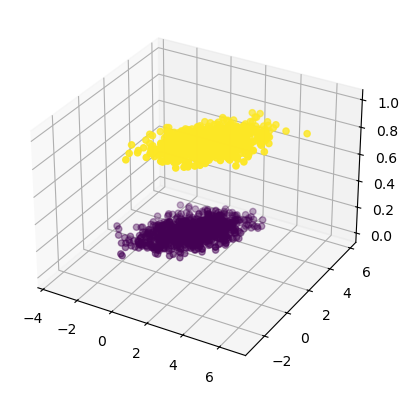

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs[:, 0], inputs[:, 1], targets[:, 0], c=targets[:, 0])
plt.show()

We can also plot without($z=0$) simply 2-dimensional space

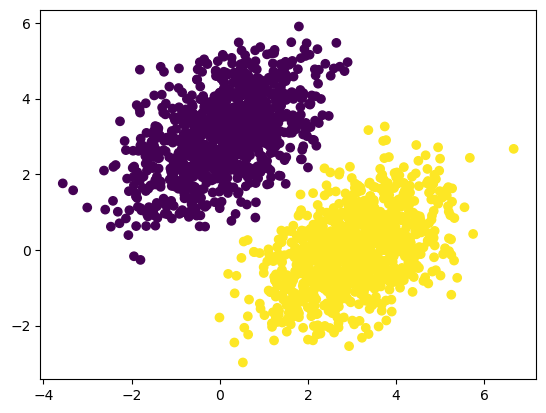

In [106]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

작성중...